<a href="https://colab.research.google.com/github/BINAYATOSH007/DATA-ANALYSIS/blob/main/Copy_of_finalcc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.under_sampling import RandomUnderSampler


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.decomposition import PCA
import sklearn.preprocessing
import math

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/creditcard.csv")

In [ ]:
print("Size of our dataset:\t", dataset.shape)
print("Columns:", dataset.shape[0], "Rows:", dataset.shape[1])
dataset.head(10)

Size of our dataset:	 (284807, 31)
Columns: 284807 Rows: 31


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [ ]:
test =dataset.sample(frac=0.13, random_state = 0)

dataset = dataset.drop(test.index)

In [ ]:
print("Test dataset:\t", test.shape)
print("Training dataset:",dataset.shape)

Test dataset:	 (37025, 31)
Training dataset: (247782, 31)


In [ ]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,247782.000000,247782.000000,247782.000000,247782.000000,247782.000000,247782.000000,247782.000000,247782.000000,247782.000000,247782.000000,...,247782.000000,247782.000000,247782.000000,247782.000000,247782.000000,247782.000000,247782.000000,247782.000000,247782.000000,247782.000000
mean,94842.591060,0.001359,-0.000862,-0.000773,0.001070,-0.001534,-0.001355,0.000573,-0.001015,-0.000157,...,-0.000119,0.000656,-0.000340,0.000460,0.000332,-0.000292,-0.000743,-0.000057,88.668815,0.001727
std,47483.105411,1.956739,1.653674,1.514439,1.417071,1.365512,1.326011,1.222583,1.204491,1.099307,...,0.735143,0.726084,0.629533,0.605010,0.521593,0.482226,0.401140,0.327201,247.667152,0.041525
min,0.000000,-56.407510,-72.715728,-33.680984,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.822684,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,54226.500000,-0.920763,-0.598416,-0.892967,-0.847945,-0.693672,-0.769172,-0.553223,-0.209065,-0.644313,...,-0.228397,-0.542809,-0.161894,-0.354272,-0.316647,-0.327469,-0.070770,-0.052949,5.670000,0.000000
50%,84727.000000,0.019192,0.064242,0.177947,-0.018124,-0.054851,-0.274799,0.040348,0.021910,-0.050693,...,-0.029127,0.007176,-0.011178,0.040885,0.017491,-0.052442,0.001099,0.011191,22.000000,0.000000
75%,139345.500000,1.315955,0.802828,1.026235,0.744339,0.610969,0.397241,0.570453,0.326826,0.597482,...,0.187072,0.529441,0.147348,0.439527,0.351052,0.240843,0.090680,0.078130,77.500000,0.000000
max,172792.000000,2.451888,22.057729,9.382558,16.875344,34.801666,23.917837,44.054461,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


In [ ]:
dataset[["Time", "Amount", "Class"]].describe()

,Time,Amount,Class
count,247782.000000,247782.000000,247782.000000
mean,94842.591060,88.668815,0.001727
std,47483.105411,247.667152,0.041525
min,0.000000,0.000000,0.000000
25%,54226.500000,5.670000,0.000000
50%,84727.000000,22.000000,0.000000
75%,139345.500000,77.500000,0.000000
max,172792.000000,19656.530000,1.000000


In [ ]:
dataset[(dataset.Class == 1) & (dataset.Amount < 2000)]["Amount"].describe()

count     427.000000
mean      122.914239
std       247.849812
min         0.000000
25%         1.000000
50%        11.390000
75%       106.270000
max      1809.680000
Name: Amount, dtype: float64

In [ ]:
dataset[(dataset.Class == 0) & (dataset.Amount < 2000)]["Amount"].describe()

count    246750.000000
mean         80.858157
std         173.398421
min           0.000000
25%           5.610000
50%          21.990000
75%          76.450000
max        1999.890000
Name: Amount, dtype: float64

In [ ]:
print("Total of missing values:",dataset.isnull().sum().max())

Total of missing values: 0


In [ ]:
print("Table of missing values:\n",dataset.isnull())

print("Sum of missing values:\n", dataset.isnull().sum())

Table of missing values:
          Time     V1     V2     V3     V4     V5     V6     V7     V8     V9  \
0       False  False  False  False  False  False  False  False  False  False   
1       False  False  False  False  False  False  False  False  False  False   
2       False  False  False  False  False  False  False  False  False  False   
3       False  False  False  False  False  False  False  False  False  False   
4       False  False  False  False  False  False  False  False  False  False   
...       ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
284801  False  False  False  False  False  False  False  False  False  False   
284803  False  False  False  False  False  False  False  False  False  False   
284804  False  False  False  False  False  False  False  False  False  False   
284805  False  False  False  False  False  False  False  False  False  False   
284806  False  False  False  False  False  False  False  False  False  False   

        ...  

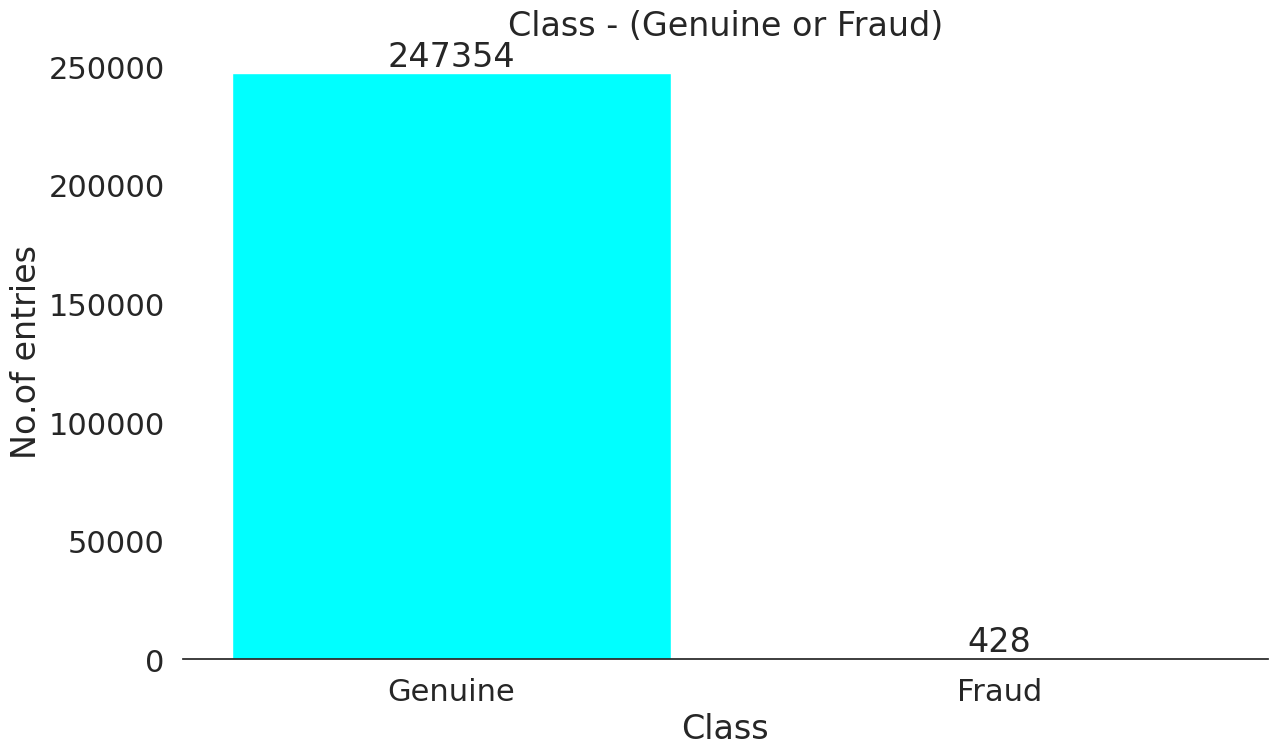

In [ ]:
class_counts = dataset["Class"].value_counts()

bar_colors = ["cyan", "red"]
plt.bar(class_counts.index, class_counts.values, color = bar_colors)

plt.xlabel("Class")
plt.ylabel("No.of entries")
plt.title("Class - (Genuine or Fraud)")

for _, value in enumerate(class_counts.values):
  plt.text(class_counts.index[_], value, str(value), ha="center", va= "bottom")

class_labels = {0: "Genuine", 1: "Fraud"}
plt.xticks(class_counts.index, [class_labels[x] for x in class_counts.index])

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_visible(False)

plt.show()

Class as pie chart:


Text(0, 0.5, '')

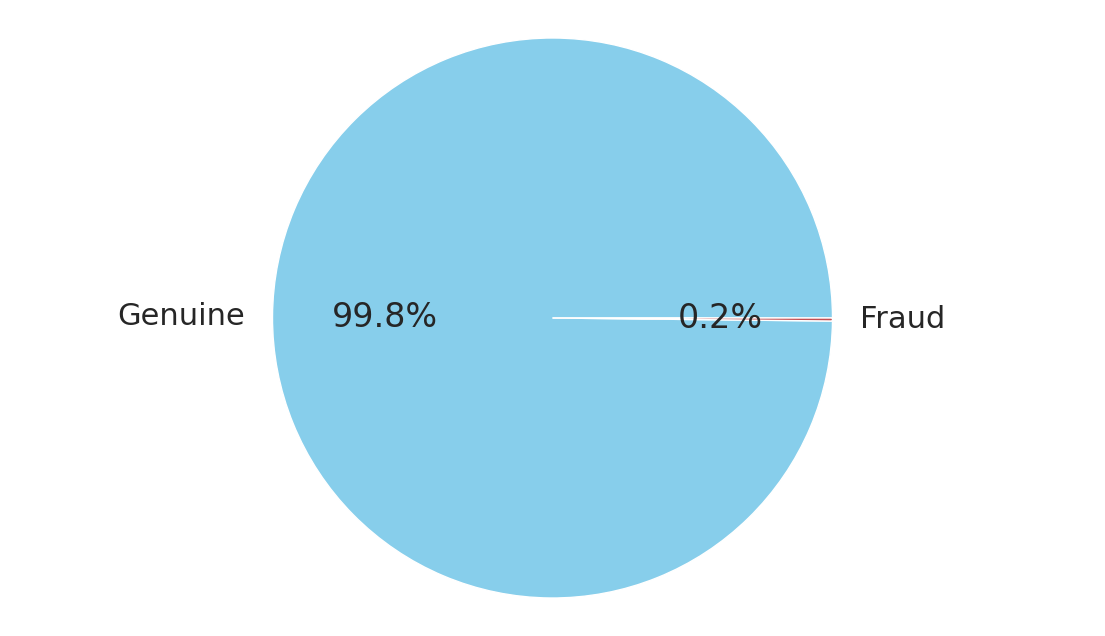

In [ ]:
print("Class as pie chart:")
fig, ax = plt.subplots(1, 1)
ax.pie(dataset.Class.value_counts(),autopct='%1.1f%%', labels=['Genuine','Fraud'], colors=['skyblue','r'])
plt.axis('equal')
plt.ylabel('')

In [ ]:
fraud_percentage = (dataset["Class"].value_counts(normalize=True) *100).loc[1]
print(f"The percentage of entries classfied as fraud is {fraud_percentage:.4f}%.")

The percentage of entries classfied as fraud is 0.1727%.


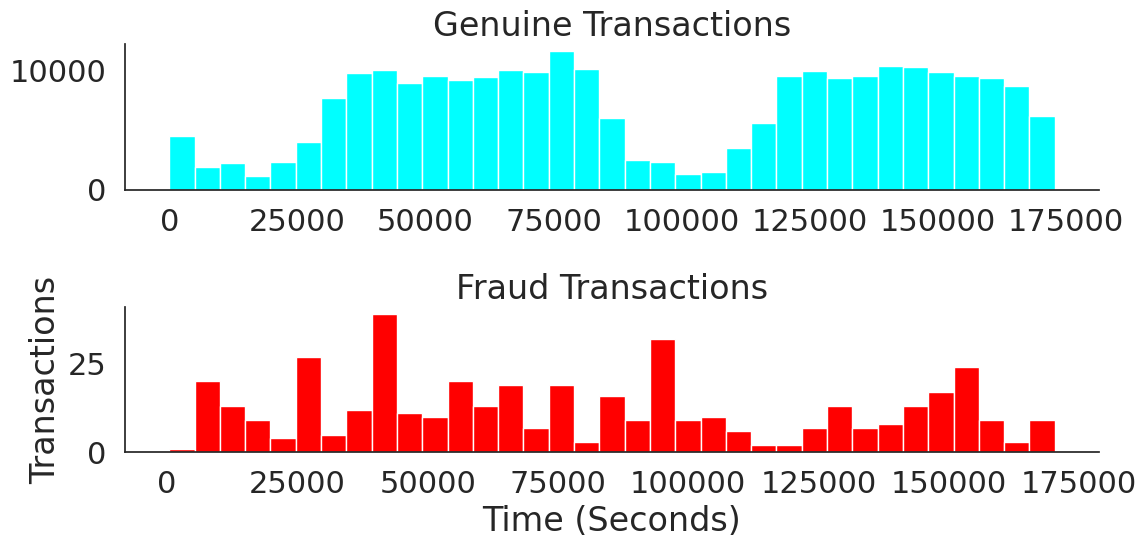

In [ ]:
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (12,6))

num_bins = 35

ax[0].hist(dataset.Time[dataset.Class == 0], bins = num_bins, color = "cyan")
ax[0].set_title("Genuine Transactions")
ax[0].spines["right"].set_visible(False)
ax[0].spines["top"].set_visible(False)

ax[1].hist(dataset.Time[dataset.Class == 1], bins = num_bins, color = "red")
ax[1].set_title("Fraud Transactions")
ax[1].set_xlabel("Time (Seconds)")
ax[1].set_ylabel("Transactions")
ax[1].spines["right"].set_visible(False)
ax[1].spines["top"].set_visible(False)

plt.tight_layout()

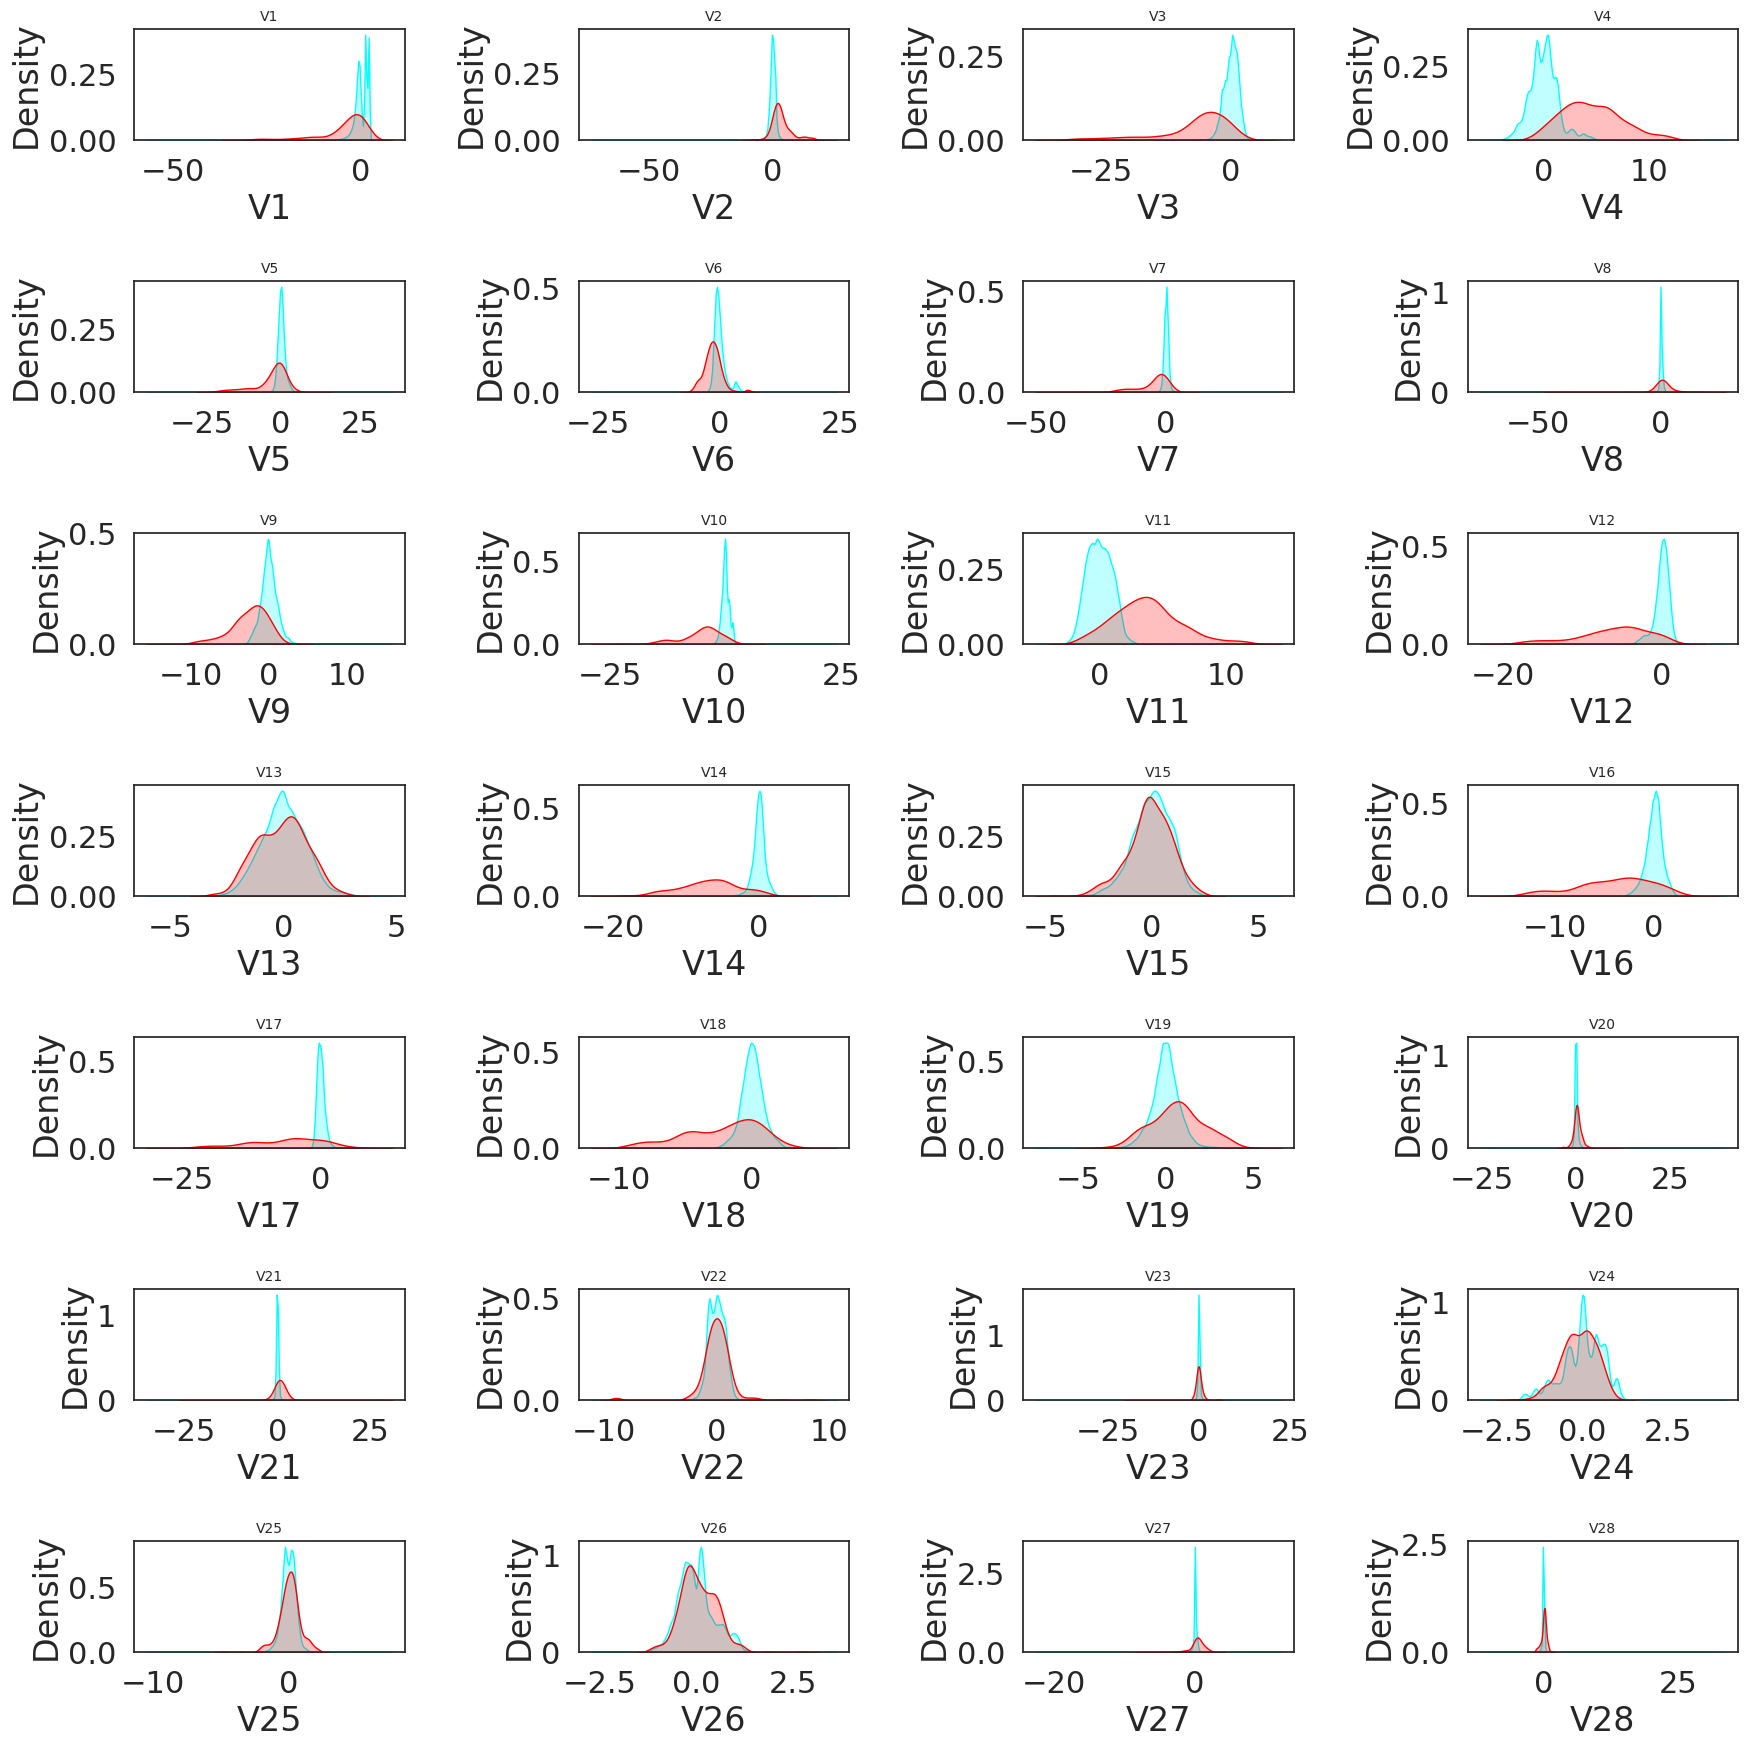

In [ ]:
column_names = dataset.drop(["Class", "Amount", "Time"], axis=1).columns
num_plots = len(column_names)
dataset_class_0 = dataset[dataset.Class == 0]
dataset_class_1 = dataset[dataset.Class == 1]

fig, ax = plt.subplots(nrows = 7, ncols = 4, figsize = (18, 18))
fig.subplots_adjust(hspace=1, wspace=1)

idx = 0
for col in column_names:
  idx += 1
  plt.subplot(7, 4, idx)
  sns.kdeplot(dataset_class_0[col], label="Class 0", fill = True,color='cyan')
  sns.kdeplot(dataset_class_1[col], label="Class 1", fill = True,color='red')
  plt.title(col, fontsize = 10)

plt.tight_layout()

In [ ]:
def split_data(dataset, drop_list):
    dataset = dataset.drop(drop_list,axis=1)
    print(dataset.columns)
    #test train split time
    from sklearn.model_selection import train_test_split
    y = dataset['Class'].values #target
    X = dataset.drop(['Class'],axis=1).values #features
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42, stratify=y)

    print("train-set size: ", len(y_train),
      "\ntest-set size: ", len(y_test))
    print("fraud cases in test-set: ", sum(y_test))
    return X_train, X_test,y_train,y_test

In [ ]:
def get_predictions(clf, X_train, y_train, X_test):
    # create classifier
    clf = clf
    # fit it to training data
    clf.fit(X_train,y_train)
    # predict using test data
    y_pred = clf.predict(X_test)
    # Compute predicted probabilities: y_pred_prob
    y_pred_prob = clf.predict_proba(X_test)
    #for fun: train-set predictions
    train_pred = clf.predict(X_train)
    print('train-set confusion matrix:\n', confusion_matrix(y_train,train_pred))
    return y_pred,y_pred_prob

In [ ]:
def print_scores(y_test,y_pred,y_pred_prob):
    print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred))
    print("recall score: ", recall_score(y_test,y_pred))
    print("precision score: ", precision_score(y_test,y_pred))
    print("f1 score: ", f1_score(y_test,y_pred))
    print("accuracy score: ", accuracy_score(y_test,y_pred))


# Case-NB-1 : do not drop anything

In [ ]:
drop_list = []
X_train, X_test, y_train, y_test = split_data(dataset, drop_list)
y_pred, y_pred_prob = get_predictions(GaussianNB(), X_train, y_train, X_test)
print_scores(y_test,y_pred,y_pred_prob)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
train-set size:  198225 
test-set size:  49557
fraud cases in test-set:  86
train-set confusion matrix:
 [[196578   1305]
 [   118    224]]
test-set confusion matrix:
 [[49119   352]
 [   35    51]]
recall score:  0.5930232558139535
precision score:  0.12655086848635236
f1 score:  0.20858895705521474
accuracy score:  0.9921908105817543


# Case-NB-2 : drop some of principle components that have similar distributions

In [ ]:
drop_list = ['V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8']
X_train, X_test, y_train, y_test = split_data(dataset, drop_list)
y_pred, y_pred_prob = get_predictions(GaussianNB(), X_train, y_train, X_test)
print_scores(y_test,y_pred,y_pred_prob)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11',
       'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'Amount', 'Class'],
      dtype='object')
train-set size:  198225 
test-set size:  49557
fraud cases in test-set:  86
train-set confusion matrix:
 [[196770   1113]
 [   108    234]]
test-set confusion matrix:
 [[49189   282]
 [   36    50]]
recall score:  0.5813953488372093
precision score:  0.15060240963855423
f1 score:  0.23923444976076558
accuracy score:  0.9935831466795811


# Case-NB-3 : drop some of principle components + Time

In [ ]:
drop_list = ['Time','V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8']
X_train, X_test, y_train, y_test = split_data(dataset, drop_list)
y_pred, y_pred_prob = get_predictions(GaussianNB(), X_train, y_train, X_test)
print_scores(y_test,y_pred,y_pred_prob)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12',
       'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'Amount', 'Class'],
      dtype='object')
train-set size:  198225 
test-set size:  49557
fraud cases in test-set:  86
train-set confusion matrix:
 [[194823   3060]
 [    51    291]]
test-set confusion matrix:
 [[48702   769]
 [   15    71]]
recall score:  0.8255813953488372
precision score:  0.08452380952380953
f1 score:  0.1533477321814255
accuracy score:  0.984179833323244


# Case-NB-4 : drop some of principle components + Time + 'Amount'

In [ ]:
drop_list = ['Amount','Time','V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8']
X_train, X_test, y_train, y_test = split_data(dataset, drop_list)
y_pred, y_pred_prob = get_predictions(GaussianNB(), X_train, y_train, X_test)
print_scores(y_test,y_pred,y_pred_prob)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12',
       'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'Class'],
      dtype='object')
train-set size:  198225 
test-set size:  49557
fraud cases in test-set:  86
train-set confusion matrix:
 [[194890   2993]
 [    51    291]]
test-set confusion matrix:
 [[48725   746]
 [   15    71]]
recall score:  0.8255813953488372
precision score:  0.08690330477356181
f1 score:  0.15725359911406422
accuracy score:  0.9846439453558529


*I would say, Case-NB-4 gives me better model sensitivity (or recall) and precision as compared to Case-NB-1. So dropping some of redundant feature will ofcourse helps to make calculations fast and gain senstivity*

In [ ]:
pip install scikit-plot

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import scikitplot as skplt

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

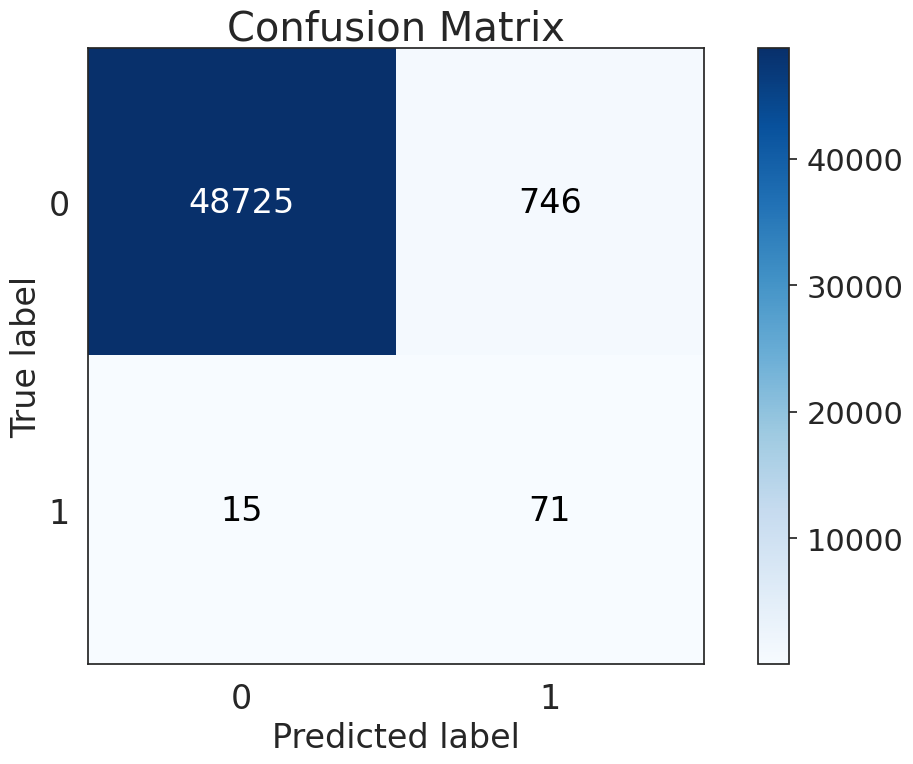

In [ ]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test,y_pred)

<ipython-input-332-5b118fbf0de4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dataset['Class'].value_counts().index,y=dataset['Class'].value_counts(), palette=["C1", "C8"])


Non Fraud %  99.83
Fraud %     0.17


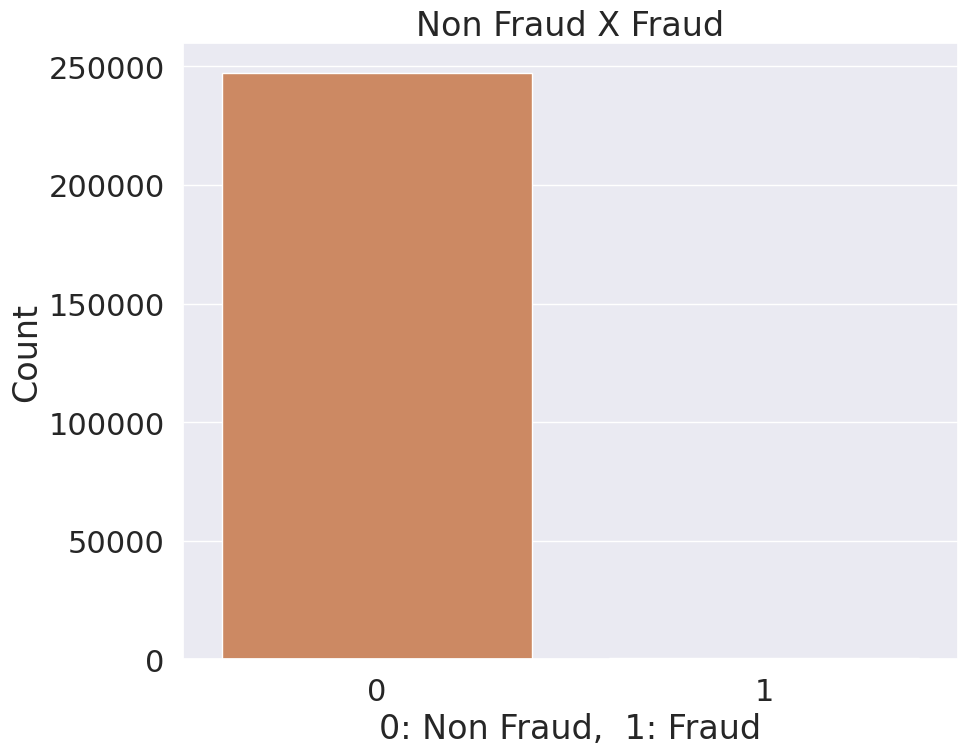

In [ ]:
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')
sns.barplot(x=dataset['Class'].value_counts().index,y=dataset['Class'].value_counts(), palette=["C1", "C8"])
plt.title('Non Fraud X Fraud')
plt.ylabel('Count')
plt.xlabel('0: Non Fraud,  1: Fraud')
print ('Non Fraud % ',round(dataset['Class'].value_counts()[0]/len(dataset)*100,2))
print ('Fraud %    ',round(dataset['Class'].value_counts()[1]/len(dataset)*100,2));

In [ ]:
feature_names = dataset.iloc[:, 1:30].columns
target = dataset.iloc[:1, 30:].columns

data_features = dataset[feature_names]
data_target = dataset[target]
feature_names

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [ ]:
target

Index(['Class'], dtype='object')

In [ ]:
np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(data_features, data_target,
                                                    train_size = 0.70, test_size = 0.30, random_state = 1)

In [ ]:
lr = LogisticRegression()


In [ ]:
lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression()

In [ ]:
def PrintStats(cmat, y_test, pred):
    tpos = cmat[0][0]
    fneg = cmat[1][1]
    fpos = cmat[0][1]
    tneg = cmat[1][0]

In [ ]:
def RunModel(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train.values.ravel())
    pred = model.predict(X_test)
    matrix = confusion_matrix(y_test, pred)
    return matrix, pred


In [ ]:
cmat, pred = RunModel(lr, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
accuracy_score(y_test, pred)

0.999139032757113

In [ ]:
print (classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     74208
           1       0.87      0.58      0.70       127

    accuracy                           1.00     74335
   macro avg       0.93      0.79      0.85     74335
weighted avg       1.00      1.00      1.00     74335



In [ ]:
# let us check recall score for logistic regression
# LR
y_pred, y_pred_prob = get_predictions(LogisticRegression(C = 0.01, penalty = 'l2')
                                      , X_train, y_train, X_test)
print_scores(y_test,y_pred,y_pred_prob)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


train-set confusion matrix:
 [[173119     27]
 [   122    179]]
test-set confusion matrix:
 [[74202     6]
 [   59    68]]
recall score:  0.5354330708661418
precision score:  0.918918918918919
f1 score:  0.6766169154228856
accuracy score:  0.9991255801439429


In [ ]:
false = dataset[dataset['Class']==1]
true = dataset[dataset['Class']==0]
n=len(false)/float(len(true))
print (n)
print('False Detection : {}'.format(len(dataset[dataset['Class']==1])))
print('True Detection:{}'.format(dataset[dataset['Class']==0]))

0.0017303136395611148
False Detection : 428
True Detection:            Time        V1        V2        V3        V4        V5        V6  \
0            0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1            0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2            1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3            1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4            2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
...          ...       ...       ...       ...       ...       ...       ...   
284801  172785.0  0.120316  0.931005 -0.546012 -0.745097  1.130314 -0.235973   
284803  172787.0 -0.732789 -0.055080  2.035030 -0.738589  0.868229  1.058415   
284804  172788.0  1.919565 -0.301254 -3.249640 -0.557828  2.630515  3.031260   
284805  172788.0 -0.240440  0.530483  0.702510  0.689799 -0.377961  0.623708   
284806  172792.0 -0.533413 -0.189733  0.703337 -0.506271 -0.0

In [ ]:
print("False Detection Transaction")
print("============================")
print(false.Amount.describe(),"\n")

#True Detection Transaction
print("True Detection Transaction")
print("============================")
print(true.Amount.describe(),"\n")

False Detection Transaction
count     428.000000
mean      127.594042
std       265.817804
min         0.000000
25%         1.000000
50%        11.395000
75%       106.637500
max      2125.870000
Name: Amount, dtype: float64 

True Detection Transaction
count    247354.000000
mean         88.601462
std         247.629867
min           0.000000
25%           5.700000
50%          22.000000
75%          77.400000
max       19656.530000
Name: Amount, dtype: float64 



In [ ]:
import pandas as pd
X = dataset.drop('Class', axis=1)
y = dataset['Class']

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) * 100
print("Accuracy:", accuracy)

confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

#Precision
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

precision=precision_score(y_test, y_pred, pos_label=1)*100
print('\n Score Precision :\n',precision )

#Recall
# Recall = TP / (TP + FN)
recall=recall_score(y_test, y_pred, pos_label=1)*100
print("\n Recall Score :\n", recall)

fscore=f1_score(y_test, y_pred, pos_label=1)*100
print("\n F1 Score :\n", fscore)

Accuracy: 99.91121335028352
Confusion Matrix:
[[49447    22]
 [   22    66]]

 Score Precision :
 75.0

 Recall Score :
 75.0

 F1 Score :
 75.0


In [ ]:
import time
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('seaborn')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef,classification_report,roc_curve

from sklearn.preprocessing import StandardScaler


<ipython-input-349-472ec9aa7b84>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


<ipython-input-350-b40dad7817b9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(amount)


<Axes: ylabel='Density'>

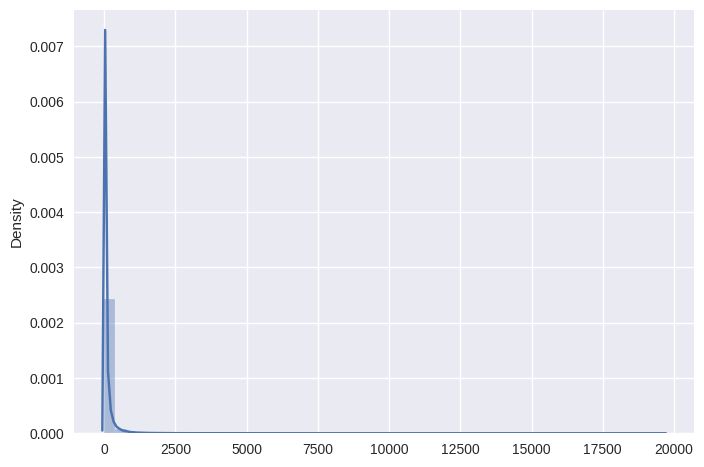

In [ ]:
amount = [dataset['Amount'].values]
sns.distplot(amount)

<ipython-input-351-638beeb8af27>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(time)


<Axes: ylabel='Density'>

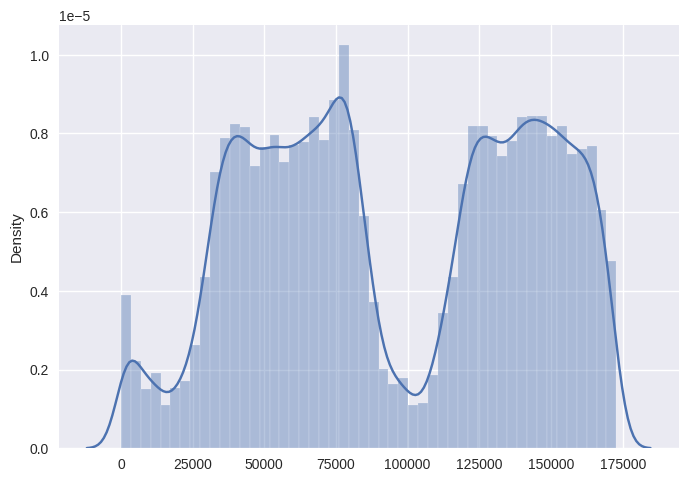

In [ ]:
time = dataset['Time'].values
sns.distplot(time)

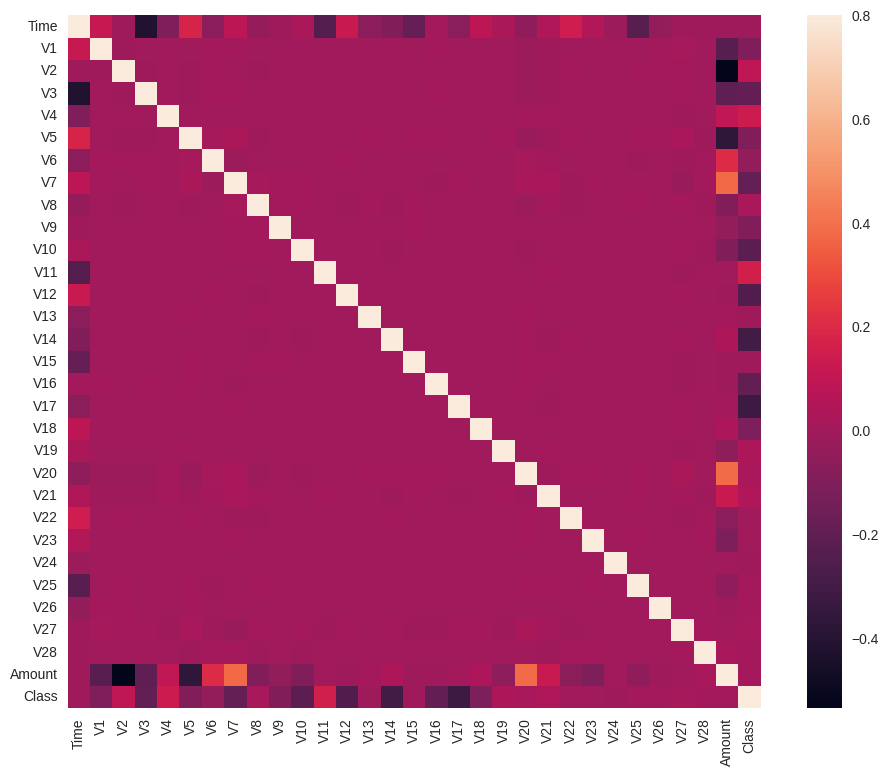

In [ ]:
correlation_matrix = dataset.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,vmax=0.8,square = True)
plt.show()

In [ ]:
X = dataset.drop(['Class'], axis = 1)
y = dataset['Class']

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X.values)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
finalDf = pd.concat([principalDf, y], axis = 1)
finalDf.head()

,principal component 1,principal component 2,Class
0,94842.594324,55.699305,0.0
1,94842.586146,-91.233893,0.0
2,94841.607008,284.744740,0.0
3,94841.592851,29.579667,0.0
4,94840.589885,-23.932323,0.0


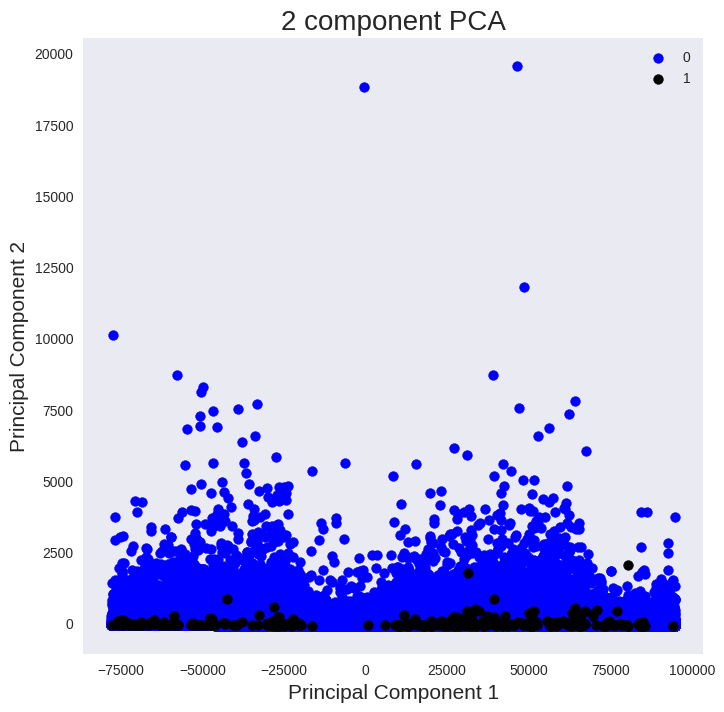

In [ ]:
# 2D visualization
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['blue', 'black']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
dataset = dataset.sample(frac=1)

frauds = dataset[dataset['Class'] == 1]
non_frauds = dataset[dataset['Class'] == 0][:492]

new_df = pd.concat([non_frauds, frauds])
# Shuffle dataframe rows
new_df = new_df.sample(frac=1, random_state=42)

new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
9439,13916.0,1.240619,0.362429,0.318717,0.709700,-0.137192,-0.529381,-0.161678,-0.078648,1.180004,...,-0.416043,-1.017629,0.096693,-0.116015,0.184709,0.061004,-0.058206,0.009350,0.99,0
139817,83374.0,-0.322899,1.215585,0.741049,0.881526,-0.167682,-0.505084,0.309599,0.370825,-1.053370,...,0.234576,0.583835,-0.067777,0.356406,-0.141238,-0.347433,-0.044694,-0.026809,12.90,0
102444,68207.0,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.391540,...,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1.00,1
261891,160230.0,-0.354884,0.268297,-0.176418,-1.401175,0.844942,0.208669,0.961762,-0.158239,-1.801981,...,-0.417545,-0.687928,-0.609689,-1.422435,1.071051,0.880906,-0.220785,-0.136923,62.50,0
10498,17230.0,-0.469327,1.111453,2.041003,1.731595,0.135147,-0.093625,0.266155,0.082988,0.580255,...,0.159387,0.592670,-0.053596,0.320748,-0.369121,-0.136605,-0.100845,0.039347,3.93,1


Text(0, 0.5, 'Frequency')

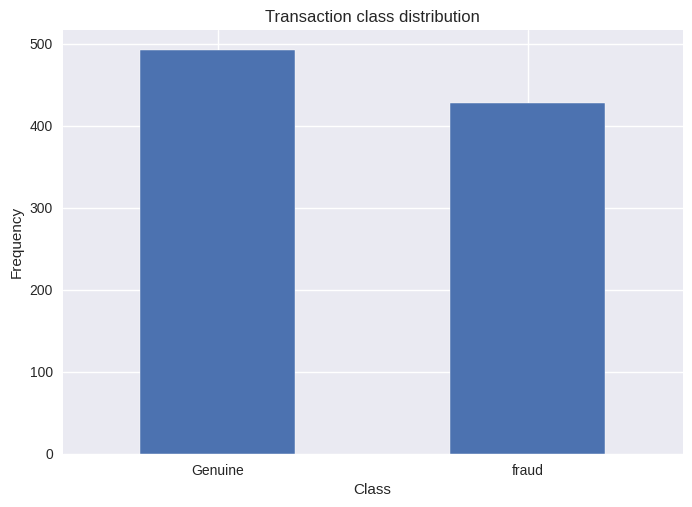

In [ ]:
labels = ['Genuine','fraud']
classes = pd.value_counts(new_df['Class'], sort = True)
classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), labels)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [ ]:
features = new_df.drop(['Class'], axis = 1)
labels = pd.DataFrame(new_df['Class'])

feature_array = features.values
label_array = labels.values

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(feature_array,label_array,test_size=0.20)

# normalize: Scale input vectors individually to unit norm (vector length).
X_train = normalize(X_train)
X_test=normalize(X_test)

In [ ]:
neighbours = np.arange(1,25)
train_accuracy =np.empty(len(neighbours))
test_accuracy = np.empty(len(neighbours))

for i,k in enumerate(neighbours):
    #Setup a knn classifier with k neighbors
    knn=KNeighborsClassifier(n_neighbors=k,algorithm="kd_tree",n_jobs=-1)

    #Fit the model
    knn.fit(X_train,y_train.ravel())

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train.ravel())

    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test.ravel())

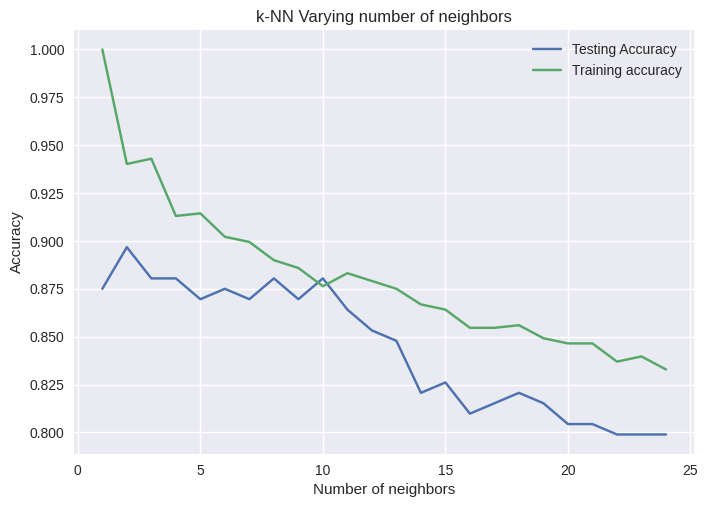

In [ ]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbours, test_accuracy, label='Testing Accuracy')
plt.plot(neighbours, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
idx = np.where(test_accuracy == max(test_accuracy))
x = neighbours[idx]

In [ ]:
#k_nearest_neighbours_classification
knn=KNeighborsClassifier(n_neighbors=x[0],algorithm="kd_tree",n_jobs=-1)
knn.fit(X_train,y_train.ravel())

KNeighborsClassifier(algorithm='kd_tree', n_jobs=-1, n_neighbors=2)

In [ ]:
KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=21, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='kd_tree', n_jobs=-1, n_neighbors=21)

In [ ]:
knn_predicted_test_labels=knn.predict(X_test)

Text(0.5, 1.0, ' Number of Blobs')

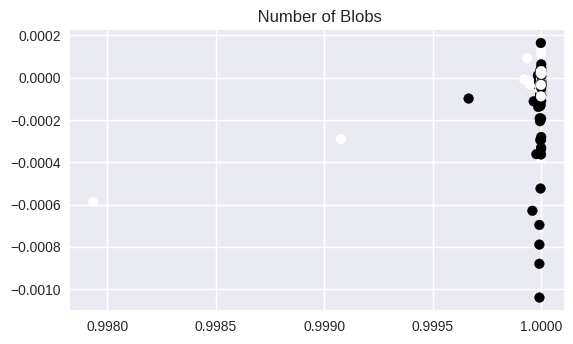

In [ ]:
from pylab import rcParams
#plt.figure(figsize=(12, 12))
rcParams['figure.figsize'] = 14, 8
plt.subplot(222)
plt.scatter(X_test[:, 0], X_test[:, 1], c=knn_predicted_test_labels)
plt.title(" Number of Blobs")

In [ ]:
#scoring knn
knn_accuracy_score  = accuracy_score(y_test,knn_predicted_test_labels)
knn_precison_score  = precision_score(y_test,knn_predicted_test_labels)
knn_recall_score    = recall_score(y_test,knn_predicted_test_labels)
knn_f1_score        = f1_score(y_test,knn_predicted_test_labels)


In [ ]:
print("")
print("K-Nearest Neighbours")
print("Scores")
print("Accuracy -->",knn_accuracy_score)
print("Precison -->",knn_precison_score)
print("Recall -->",knn_recall_score)
print("F1 -->",knn_f1_score)
print(classification_report(y_test,knn_predicted_test_labels))


K-Nearest Neighbours
Scores
Accuracy --> 0.8967391304347826
Precison --> 0.9375
Recall --> 0.8426966292134831
F1 --> 0.8875739644970413
              precision    recall  f1-score   support

           0       0.87      0.95      0.90        95
           1       0.94      0.84      0.89        89

    accuracy                           0.90       184
   macro avg       0.90      0.90      0.90       184
weighted avg       0.90      0.90      0.90       184



Confusion Matrix:
[[90  5]
 [14 75]]


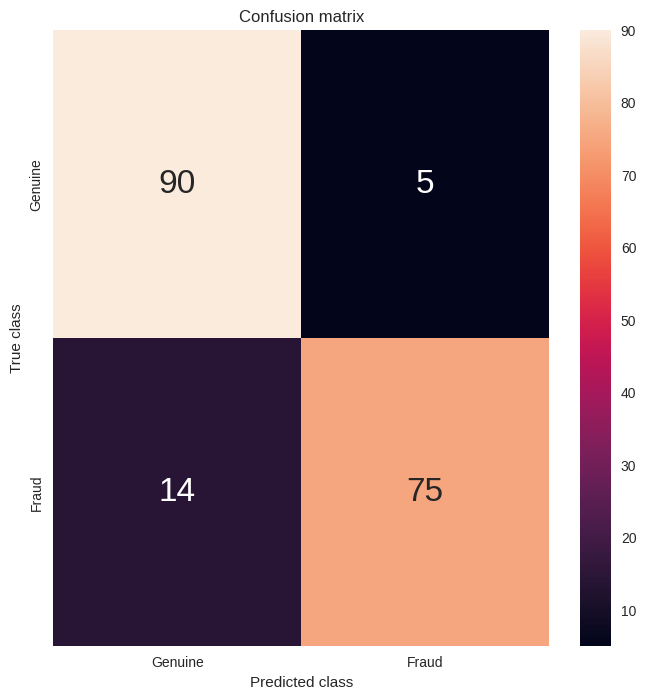

In [ ]:
import seaborn as sns
LABELS = ['Genuine', 'Fraud']
conf_matrix = confusion_matrix(y_test, knn_predicted_test_labels)
print("Confusion Matrix:")
print(conf_matrix)
plt.figure(figsize=(8,8))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=20,criterion='entropy', random_state=0,max_depth=10)
classifier.fit(X_train,y_train)

<ipython-input-371-40f41a8ff484>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train,y_train)


RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=20,
                       random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import  classification_report, confusion_matrix
print('Classifcation report:\n', classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_matrix)

Classifcation report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95        95
           1       1.00      0.88      0.93        89

    accuracy                           0.94       184
   macro avg       0.95      0.94      0.94       184
weighted avg       0.95      0.94      0.94       184

Confusion matrix:
 [[95  0]
 [11 78]]


In [ ]:
#model_2
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=30,criterion='entropy', random_state=0,max_depth=10)
classifier.fit(X_train,y_train)

<ipython-input-374-3d4c37472ff5>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train,y_train)


RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=30,
                       random_state=0)

In [ ]:
y_pred_2 = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import  classification_report, confusion_matrix
print('Classifcation report:\n', classification_report(y_test, y_pred_2))
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred_2)
print('Confusion matrix:\n', conf_matrix)

Classifcation report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94        95
           1       1.00      0.87      0.93        89

    accuracy                           0.93       184
   macro avg       0.94      0.93      0.93       184
weighted avg       0.94      0.93      0.93       184

Confusion matrix:
 [[95  0]
 [11 78]]


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline


# Define which resampling method and which ML model to use in the pipeline
resampling = RandomUnderSampler()
model = RandomForestClassifier(n_estimators=30,criterion='entropy', random_state=0,max_depth=10)


# Define the pipeline and combine sampling method with the RF model
pipeline = Pipeline([('RandomUnderSampler', resampling), ('RF', model)])
pipeline.fit(X_train, y_train)
predicted = pipeline.predict(X_test)


# Obtain the results from the classification report and confusion matrix
print('Classifcation report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_matrix)

Classifcation report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95        95
           1       0.99      0.91      0.95        89

    accuracy                           0.95       184
   macro avg       0.95      0.95      0.95       184
weighted avg       0.95      0.95      0.95       184

Confusion matrix:
 [[95  0]
 [11 78]]


In [ ]:
# This is the pipeline module we need from imblearn for Oversampling
from imblearn.over_sampling import RandomOverSampler
# Define which resampling method and which ML model to use in the pipeline
resampling = RandomOverSampler()
model = RandomForestClassifier(n_estimators=30,criterion='entropy', random_state=0,max_depth=10)

# Define the pipeline and combine sampling method with the model
pipeline = Pipeline([('RandomOverSampler', resampling), ('RF', model)])
pipeline.fit(X_train, y_train)
predicted = pipeline.predict(X_test)


# Obtain the results from the classification report and confusion matrix
print('Classifcation report:\n', classification_report(y_test, predicted))
conf_matrix = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_matrix)

Classifcation report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95        95
           1       1.00      0.90      0.95        89

    accuracy                           0.95       184
   macro avg       0.96      0.95      0.95       184
weighted avg       0.96      0.95      0.95       184

Confusion matrix:
 [[95  0]
 [ 9 80]]


In [ ]:
# This is the pipeline module we need from imblearn for SMOTE
from imblearn.over_sampling import SMOTE
# Define which resampling method and which ML model to use in the pipeline
resampling = SMOTE(sampling_strategy='auto',random_state=0)
model = RandomForestClassifier(n_estimators=30,criterion='entropy', random_state=0,max_depth=10)

# Define the pipeline and combine sampling method with the model
pipeline = Pipeline([('SMOTE', resampling), ('RF', model)])
pipeline.fit(X_train, y_train)
predicted = pipeline.predict(X_test)


# Obtain the results from the classification report and confusion matrix
print('Classifcation report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_matrix)

Classifcation report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95        95
           1       1.00      0.90      0.95        89

    accuracy                           0.95       184
   macro avg       0.96      0.95      0.95       184
weighted avg       0.96      0.95      0.95       184

Confusion matrix:
 [[95  0]
 [ 9 80]]


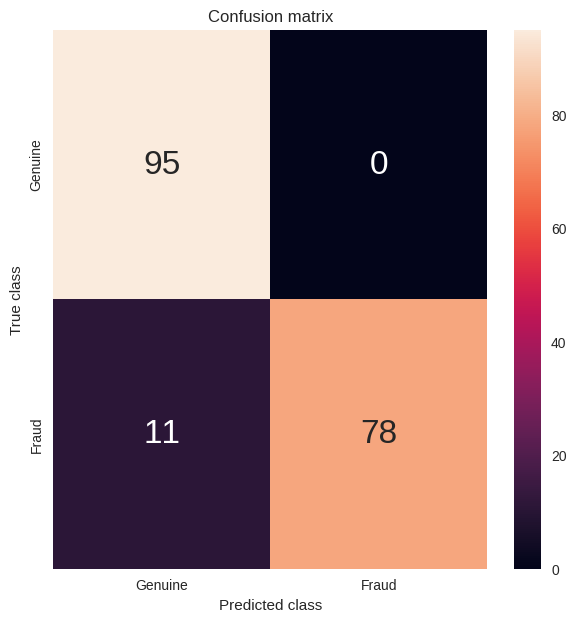

In [ ]:
#visulalizing the confusion matrix
LABELS = ['Genuine', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize =(7, 7))
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

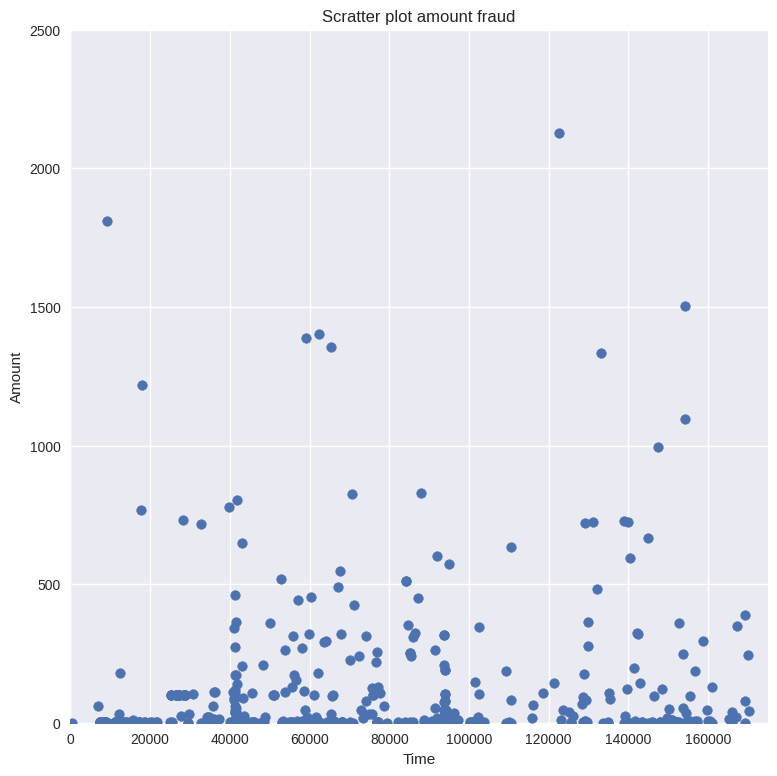

In [ ]:
df = dataset[dataset['Class'] == 1] # Recovery of fraud data
plt.figure(figsize=(9,9))
plt.scatter(df['Time'], df['Amount']) # Display fraud amounts according to their time
plt.title('Scratter plot amount fraud')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.xlim([0,175000])
plt.ylim([0,2500])
plt.show()

In [ ]:
nb_big_fraud = df[df['Amount'] > 1000].shape[0] # Recovery of frauds over 1000
print('There are only '+ str(nb_big_fraud) + ' frauds where the amount was bigger than 1000 over ' + str(df.shape[0]) + ' frauds')

There are only 9 frauds where the amount was bigger than 1000 over 428 frauds


In [ ]:
number_fraud = len(dataset[dataset.Class == 1])
number_no_fraud = len(dataset[dataset.Class == 0])
print('There are only '+ str(number_fraud) + ' frauds in the original dataset, even though there are ' + str(number_no_fraud) +' no frauds in the dataset.')

There are only 428 frauds in the original dataset, even though there are 247354 no frauds in the dataset.


In [ ]:
print("The accuracy of the classifier then would be : "+ str((284315-492)/284315)+ " which is the number of good classification over the number of tuple to classify")

The accuracy of the classifier then would be : 0.998269524998681 which is the number of good classification over the number of tuple to classify


In [ ]:
# We seperate ours data in two groups : a train dataset and a test dataset

# First we build our train dataset
df_train_all = dataset[0:150000] # We cut in two the original dataset
df_train_1 = df_train_all[df_train_all['Class'] == 1] # We seperate the data which are the frauds and the no frauds
df_train_0 = df_train_all[df_train_all['Class'] == 0]
print('In this dataset, we have ' + str(len(df_train_1)) +" frauds so we need to take a similar number of non-fraud")

df_sample=df_train_0.sample(300)
df_train = df_train_1.append(df_sample) # We gather the frauds with the no frauds.
df_train = df_train.sample(frac=1)

In this dataset, we have 268 frauds so we need to take a similar number of non-fraud


<ipython-input-385-77859596b11b>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train_1.append(df_sample) # We gather the frauds with the no frauds.


In [ ]:
X_train = df_train.drop(['Time', 'Class'],axis=1) # We drop the features Time (useless), and the Class (label)
y_train = df_train['Class'] # We create our label
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

In [ ]:
df_test_all = dataset[150000:]

X_test_all = df_test_all.drop(['Time', 'Class'],axis=1)
y_test_all = df_test_all['Class']
X_test_all = np.asarray(X_test_all)
y_test_all = np.asarray(y_test_all)

In [ ]:
dataset.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
df_corr = df.corr()

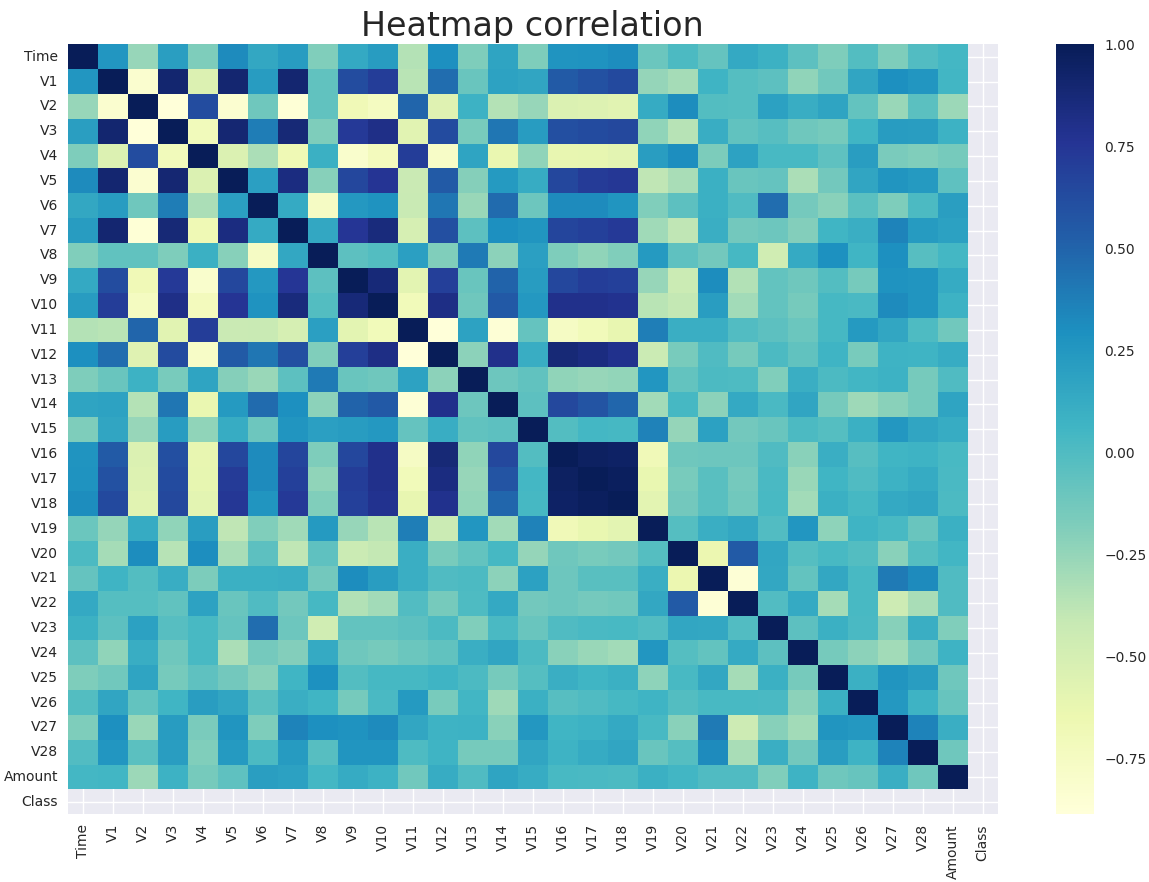

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df_corr, cmap="YlGnBu") # Displaying the Heatmap
sns.set(font_scale=2,style='white')

plt.title('Heatmap correlation')
plt.show()

In [ ]:
rank = df_corr['Class'] # Retrieving the correlation coefficients per feature in relation to the feature class
df_rank = pd.DataFrame(rank)
df_rank = np.abs(df_rank).sort_values(by='Class',ascending=False) # Ranking the absolute values of the coefficients
                                                                  # in descending order
df_rank.dropna(inplace=True) # Removing Missing Data (not a number)

In [ ]:
X_train_rank = df_train[df_rank.index[1:11]] # We take the first ten ranked features
X_train_rank = np.asarray(X_train_rank)

In [ ]:
X_test_all_rank = df_test_all[df_rank.index[1:11]]
X_test_all_rank = np.asarray(X_test_all_rank)
y_test_all = np.asarray(y_test_all)

In [ ]:
class_names=np.array(['0','1'])

In [ ]:
# Function to plot the confusion Matrix
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
classifier = svm.SVC(kernel='linear')

In [ ]:
classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
prediction_SVM_all = classifier.predict(X_test_all) #And finally, we predict our data test.

In [ ]:
import itertools

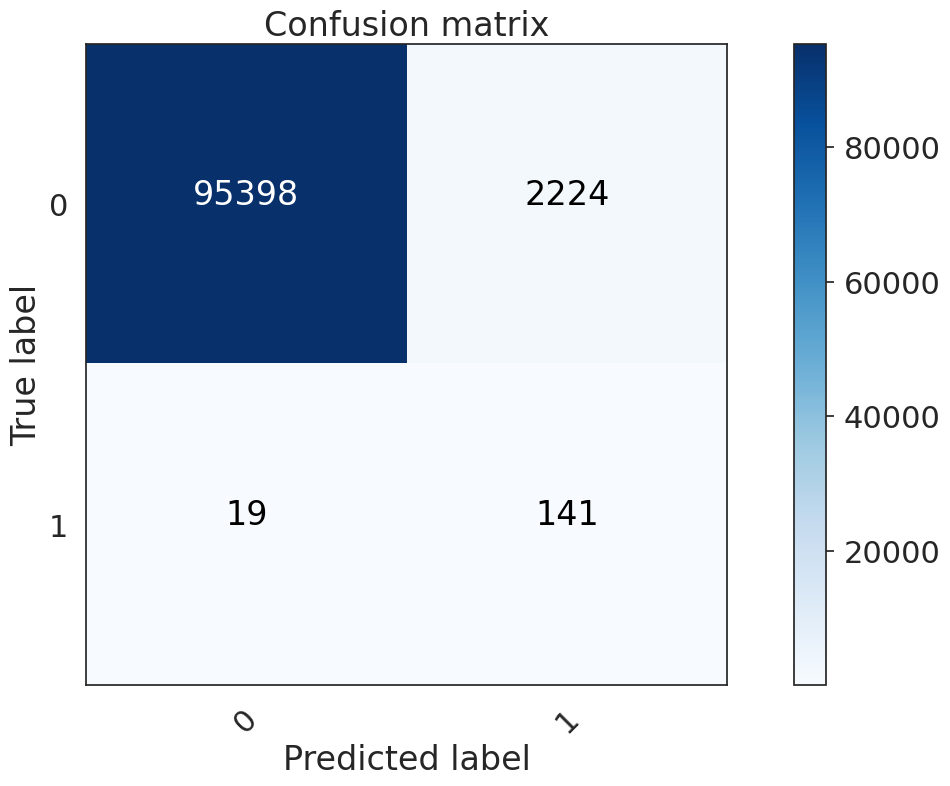

In [ ]:
cm = confusion_matrix(y_test_all, prediction_SVM_all)
plot_confusion_matrix(cm,class_names)

In [ ]:
print('Our criterion give a result of '
      + str( ( (cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1])) + 4 * cm[1][1]/(cm[1][0]+cm[1][1])) / 5))

Our criterion give a result of 0.9004122435622097


In [ ]:
print('We have detected ' + str(cm[1][1]) + ' frauds / ' + str(cm[1][1]+cm[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + str(cm[1][1]/(cm[1][1]+cm[1][0])))
print("the accuracy is : "+str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))

We have detected 141 frauds / 160 total frauds.

So, the probability to detect a fraud is 0.88125
the accuracy is : 0.977061217811049


In [ ]:
print('Our criterion give a result of '
      + str( ( (cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1])) + 4 * cm[1][1]/(cm[1][0]+cm[1][1])) / 5))

Our criterion give a result of 0.9004122435622097


In [ ]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_matrix)

Confusion matrix:
 [[95  0]
 [11 78]]


In [ ]:
print('Classifcation report:\n', classification_report(y_test, predicted))

Classifcation report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95        95
           1       1.00      0.90      0.95        89

    accuracy                           0.95       184
   macro avg       0.96      0.95      0.95       184
weighted avg       0.96      0.95      0.95       184

